In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

## 2D regression dataset

In [37]:
num_points = 70
# X1 = np.linspace(-2.5, 1.9, num_points)
X1 = np.linspace(-2.5, 2.5, num_points)
X2 = np.linspace(-2.5, 3, num_points)
# X2 = np.linspace(-2.2, 2.1, num_points)
X1, X2 = np.meshgrid(X1, X2)

Y = np.sin(np.sqrt(X1**2 + X2**2))*2-1. - 0.1*(X1)+0.02*(X2)
# Y = np.sqrt(X1**2 + X2**2)

####Scaling the data to range -1,1
X1 = 2*(X1 - X1.min())/(X1.max() - X1.min()) -1
X2 = 2*(X2 - X2.min())/(X2.max() - X2.min()) -1
Y = 2*(Y - Y.min())/(Y.max() - Y.min()) -1
Y = Y*0.25

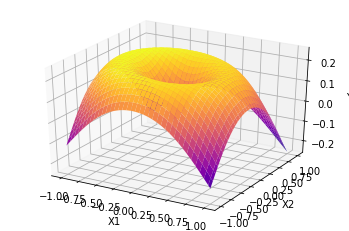

In [38]:
x1 = X1.reshape(-1)
x2 = X2.reshape(-1)
y = Y.reshape(-1)

xx = torch.Tensor(np.c_[x1, x2])
yy = torch.Tensor(Y.reshape(-1,1))

%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X1, X2, Y, cmap='plasma')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

In [59]:
model = nn.Sequential(
            nn.Linear(3, 1),
#             nn.LeakyReLU(0.1),
            nn.Softplus(),
            nn.Linear(1, 1))

In [60]:
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.MSELoss()

In [61]:
xx_ = torch.cat([xx, torch.ones(xx.shape[0], 1)], dim=1)
xx_.shape

torch.Size([4900, 3])

In [62]:
%matplotlib tk
fig = plt.figure(figsize=(9,8))
ax = fig.gca(projection='3d')

for epoch in range(10000):
    XX = torch.autograd.Variable(xx_, requires_grad=True)
    yhat = model(XX)
    
    dxx = torch.autograd.grad(outputs=yhat, inputs=XX,
                              grad_outputs=torch.ones_like(yhat),
                              only_inputs=True, retain_graph=True, create_graph=True)[0]
    yout = dxx[:, 2:]
    
    loss = criterion(yout, yy)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch%200 == 0:

        error = float(loss)
        print(f'Epoch:{epoch} | Error:{error}')
        ax.clear()
        
        ax.scatter(X1, X2, Y)
        yout_ = yout.data.reshape(Y.shape)
        ax.scatter(X1, X2, yout_, color='r', marker='.')
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('Y')
        
        fig.canvas.draw()
        plt.pause(0.01)

Epoch:0 | Error:0.04315272346138954
Epoch:200 | Error:0.006736493669450283
Epoch:400 | Error:0.006195785477757454
Epoch:600 | Error:0.006005529314279556
Epoch:800 | Error:0.005886523053050041
Epoch:1000 | Error:0.005794585216790438
Epoch:1200 | Error:0.005723762791603804
Epoch:1400 | Error:0.005668660160154104
Epoch:1600 | Error:0.005623571574687958
Epoch:1800 | Error:0.005585100036114454
Epoch:2000 | Error:0.005555089097470045
Epoch:2200 | Error:0.005532565992325544


TclError: invalid command name "pyimage150"